In [1]:
import os
os.getcwd()

'C:\\Users\\User\\DS'

In [2]:
os.chdir("C:/Users/User/Desktop/DATA SETS")

In [3]:
os.getcwd()

'C:\\Users\\User\\Desktop\\DATA SETS'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as pe
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

C:\Users\User\AppData\Local\Temp\ipykernel_15284\2539406040.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
C:\Users\User\AppData\Local\Temp\ipykernel_15284\2539406040.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';',


In [6]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [8]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
df=df.fillna(df.mean())

In [10]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

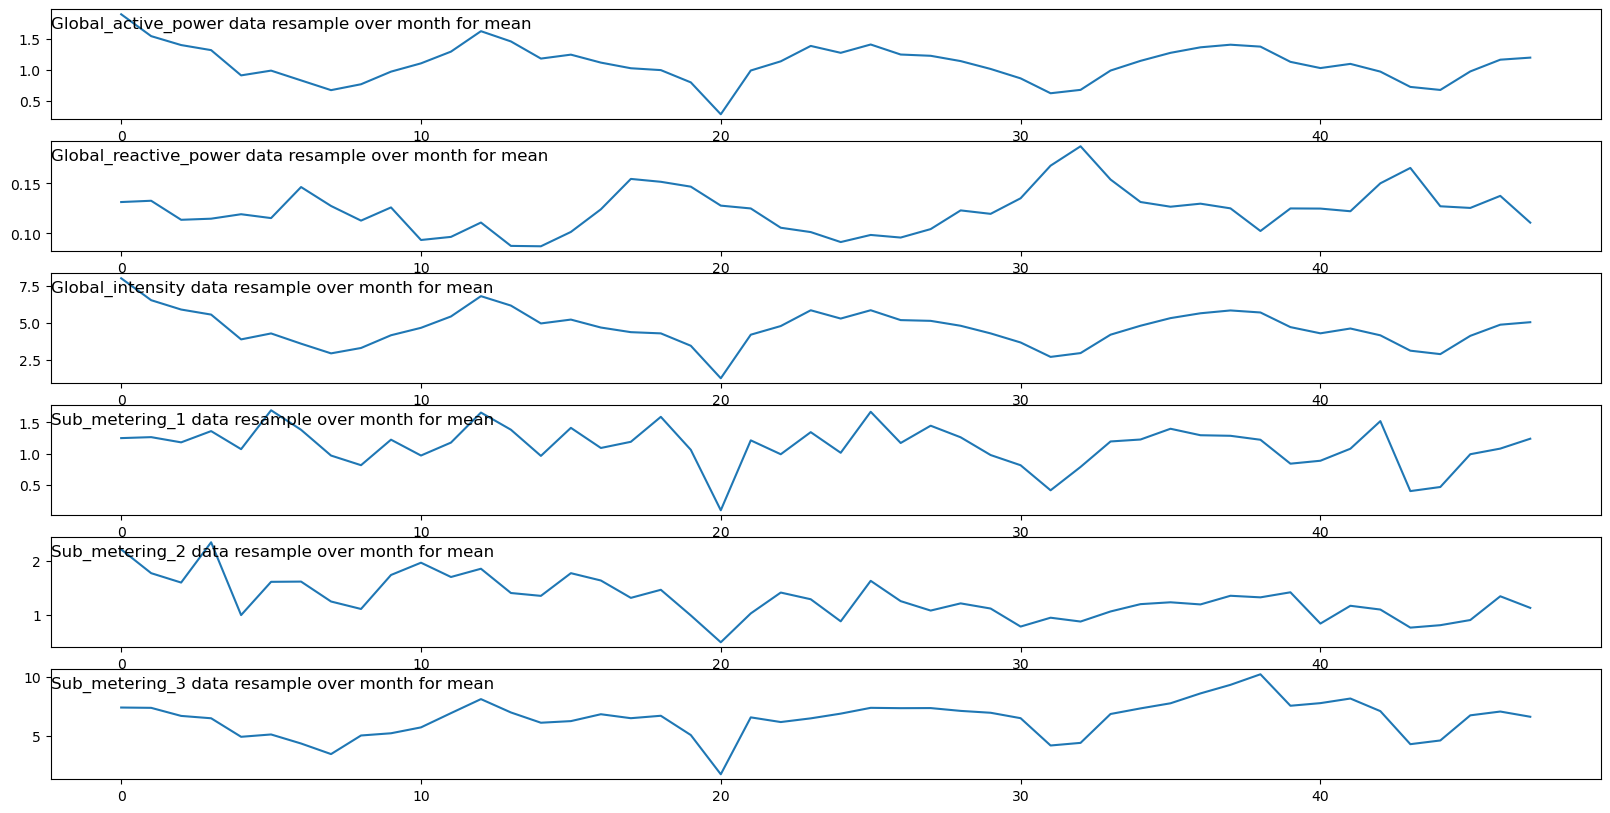

In [11]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

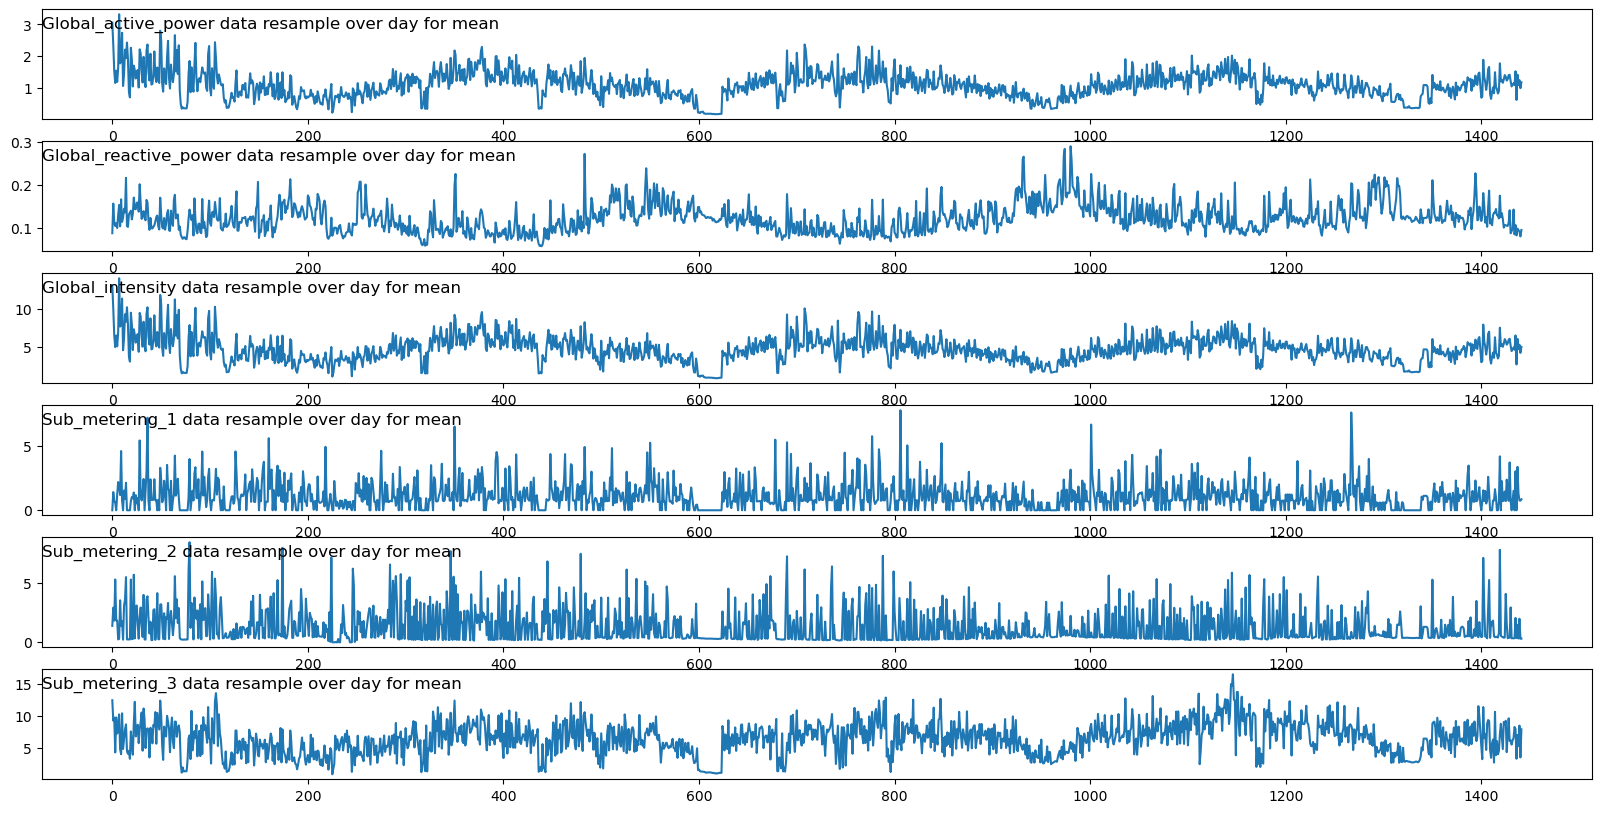

In [12]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over day for mean', y=0.75, loc='left')
    i += 1
plt.show()

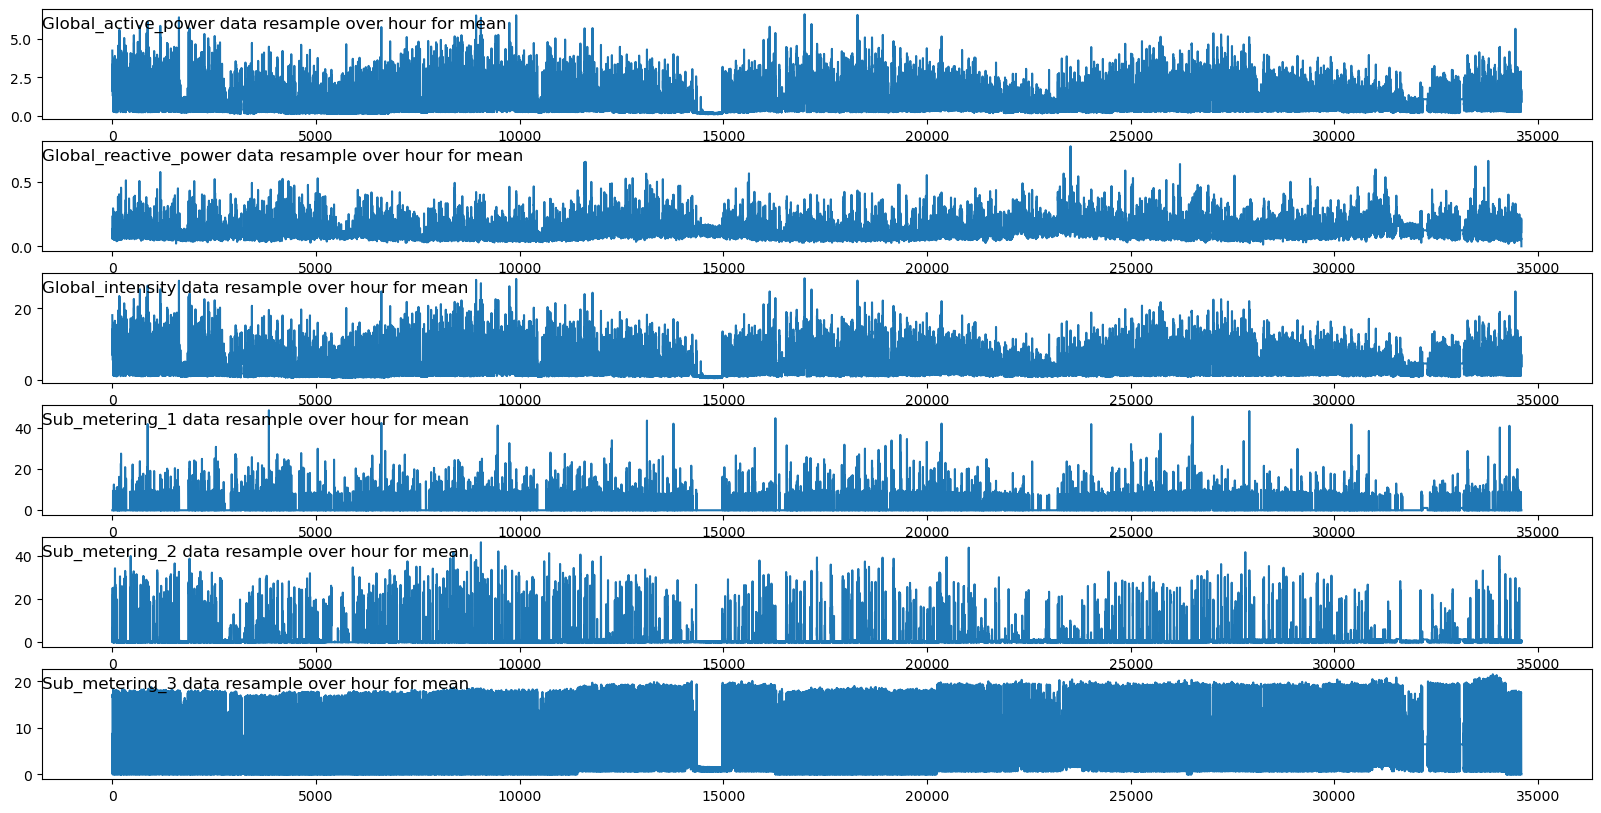

In [13]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

In [14]:
df = df[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [15]:
df_resample = df.resample('h').mean() 

In [16]:
df_resample.shape

(34589, 7)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
values = df_resample.values

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [20]:
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545045,0.103358,0.335501,0.541487,0.144652,0.0,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.030869,0.0,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.000000,0.0,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.008973,0.0,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.002872,0.0,0.205723,0.455597


In [21]:
# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values

In [22]:
n_train_time = 4000

In [23]:
train = values[:n_train_time, :]
test = values[n_train_time:, :]

In [24]:
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [25]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
! pip install keras

In [ ]:
! pip install tensorflow

In [29]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score

ModuleNotFoundError: No module named 'tensorflow'

In [26]:
size = df_resample.shape[1]

In [28]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))

NameError: name 'Sequential' is not defined

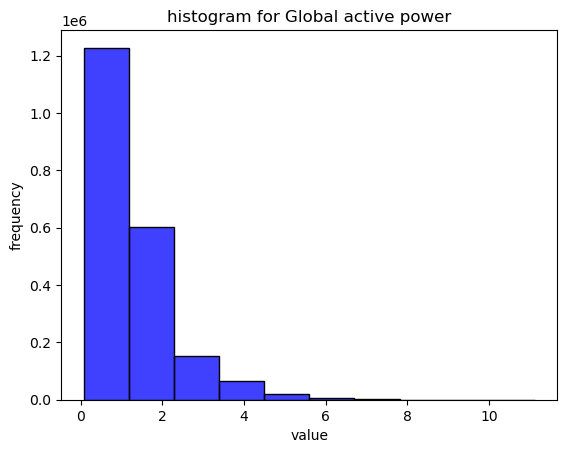

In [31]:
col=df['Global_active_power']
sns.histplot(col,bins=10,kde=False,color='blue',edgecolor='black')
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('histogram for Global active power')
plt.show()

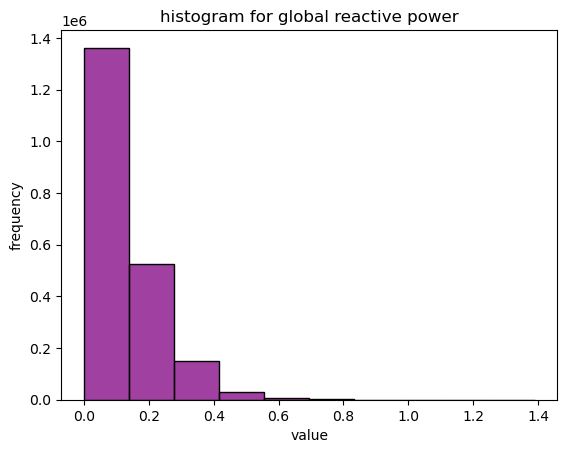

In [32]:
reac=df['Global_reactive_power']
sns.histplot(reac,bins=10,kde=False,color='purple',edgecolor='black')
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('histogram for global reactive power')
plt.show()

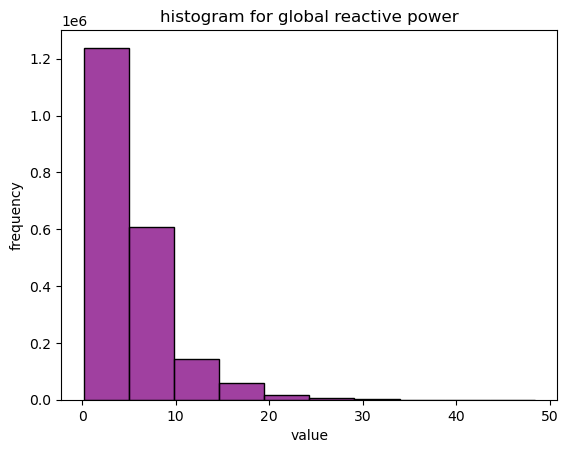

In [33]:
ins=df['Global_intensity']
sns.histplot(ins,bins=10,kde=False,color='purple',edgecolor='black')
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('histogram for global reactive power')
plt.show()

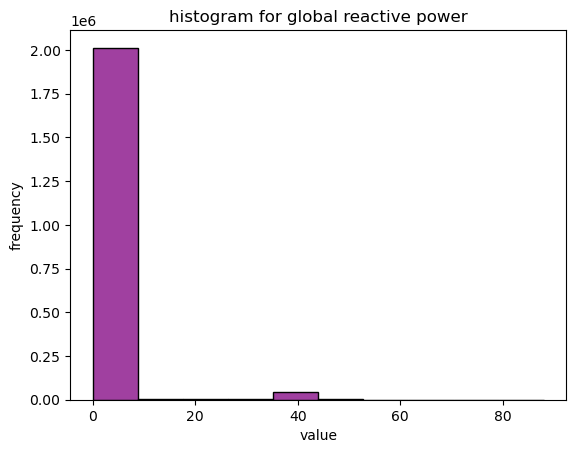

In [34]:
ins=df['Sub_metering_1']
sns.histplot(ins,bins=10,kde=False,color='purple',edgecolor='black')
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('histogram for global reactive power')
plt.show()

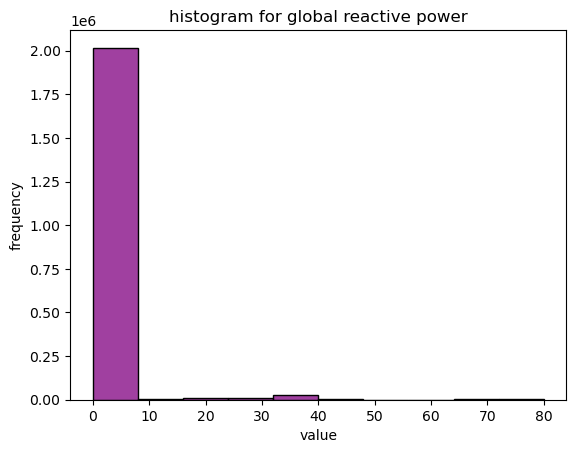

In [35]:
ins=df['Sub_metering_2']
sns.histplot(ins,bins=10,kde=False,color='purple',edgecolor='black')
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('histogram for global reactive power')
plt.show()

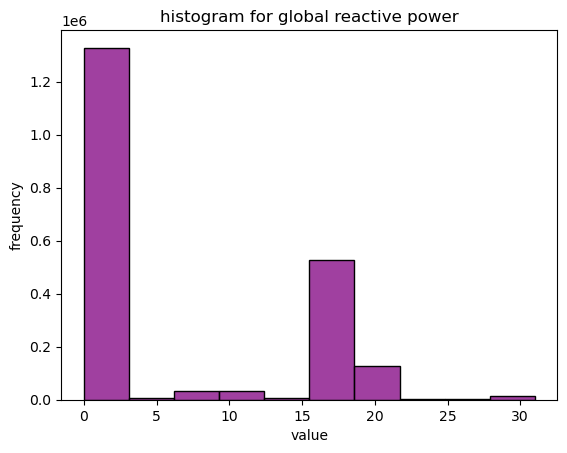

In [36]:
ins=df['Sub_metering_3']
sns.histplot(ins,bins=10,kde=False,color='purple',edgecolor='black')
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('histogram for global reactive power')
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler
series = Series(df['Global_active_power'])
print(series)
# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print
normalized = scaler.transform(values)
print(normalized)
# inverse transform and print
inversed = scaler.inverse_transform(normalized)
print(inversed)

dt
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2075259, dtype: float64
Min: 0.076000, Max: 11.122000
[[0.37479631]
 [0.47836321]
 [0.47963064]
 ...
 [0.0780373 ]
 [0.07767518]
 [0.07749412]]


In [38]:
from pandas import Series